In [1]:
import pandas as pd

# 데이터 로드
data_path = r'C:\team_proj\dog_adoption\Mung_ai\dog_adopt_eda.csv'
df = pd.read_csv(data_path)

# 각 피처의 고유한 값들과 그 개수 확인
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' 피처의 고유 값 개수: {unique_count}")
    print(f"'{column}' 피처의 고유 값들: {unique_values}\n")

'Unnamed: 0' 피처의 고유 값 개수: 1868
'Unnamed: 0' 피처의 고유 값들: [   1    2    3 ... 1866 1867 1868]

'품종' 피처의 고유 값 개수: 51
'품종' 피처의 고유 값들: ['믹스견' '비숑 프리제' '푸들' '말티즈' '웰시 코기 카디건' '잉글리쉬 포인터' '포메라니안' '치와와'
 '이탈리안 그레이 하운드' '시츄' '요크셔 테리어' '셔틀랜드 쉽독' '토이 푸들' '시바' '시베리안 허스키' '스피츠'
 '라브라도 리트리버' '진도견' '보스턴 테리어' '미디엄 푸들' '보더 콜리' '사모예드' '잭 러셀 테리어'
 '그레이트 피레니즈' '그레이 하운드' '올드 잉글리쉬 불독' '골든 리트리버' '라이카' '슈나우져' '프렌치 불독'
 '마리노이즈' '페키니즈' '휘펫' '삽살개' '닥스훈트' '코카 스파니엘' '아키다' '도베르만' '차우차우' '화이트테리어'
 '퍼그' '화이트리트리버' '웰시 코기 펨브로크' '베들링턴 테리어' '포인터' '빠삐용' '불독' '말라뮤트'
 '올드 잉글리쉬 쉽독' '저먼 셰퍼드 독' '셰퍼드']

'성별' 피처의 고유 값 개수: 3
'성별' 피처의 고유 값들: ['수컷' '암컷' '미상']

'무게(Kg)' 피처의 고유 값 개수: 83
'무게(Kg)' 피처의 고유 값들: [ 9.3   4.3   6.    4.5   5.2   2.6  23.    0.1  11.3   2.5   4.4   1.3
  1.1   2.4   4.1   5.5   2.2   3.2   5.8   3.8   3.5   2.8   2.9   3.
  3.6   3.9   2.3   2.    0.9   1.    1.8   5.   10.   15.   12.    7.
  0.5  20.    4.    8.   25.   18.    5.7  22.5  30.   45.    0.2   9.
  0.25 17.   16.   40.   22.    0.8  13.   14.    

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce

# 'Unnamed: 0' 피처 제거
df = df.drop(columns=['Unnamed: 0'])

# 1. 품종: Frequency Encoding (빈도수 인코딩)
df['품종_freq'] = df['품종'].map(df['품종'].value_counts())

# 2. 성별: Label Encoding
label_encoder = LabelEncoder()
df['성별'] = label_encoder.fit_transform(df['성별'])

# 3. 무게(Kg): Standard Scaling
scaler = StandardScaler()
df['무게(Kg)'] = scaler.fit_transform(df[['무게(Kg)']])

# 4. 상태: Label Encoding (입양 여부)
df['상태'] = label_encoder.fit_transform(df['상태'])

# 5. 나이: 그대로 사용 (숫자형 연속 데이터)
# 이미 숫자이므로 추가적인 인코딩 필요 없음

# 6. 성격: Label Encoding
df['성격'] = label_encoder.fit_transform(df['성격'])

# 7. 색: Label Encoding
df['색'] = label_encoder.fit_transform(df['색'])

# 8. 중성화유무: Label Encoding
df['중성화유무'] = label_encoder.fit_transform(df['중성화유무'])

# 9. 건강: Target Encoding
target_enc = ce.TargetEncoder(cols=['건강'])
df['건강'] = target_enc.fit_transform(df['건강'], df['상태'])

# 10. 칩등록여부: Label Encoding
df['칩등록여부'] = label_encoder.fit_transform(df['칩등록여부'])

# 11. 보유물건: Label Encoding
df['보유물건'] = label_encoder.fit_transform(df['보유물건'])

# 품종 원래 컬럼 제거 (원하는 경우)
df.drop(columns=['품종'], inplace=True)

# 인코딩된 데이터프레임 확인
print(df.head())


   성별    무게(Kg)  상태  나이  성격  색  중성화유무        건강  칩등록여부  보유물건  품종_freq
0   1  0.233447   0  44   1  1      1  0.341880      0     0     1422
1   1 -0.489242   1  68   1  5      2  0.430473      0     0       19
2   1 -0.243527   1  32   1  5      2  0.430473      0     0       19
3   1 -0.460334   1  44   1  0      2  0.341880      0     0       61
4   2 -0.359158   1  67   1  5      0  0.430473      0     0       19


In [3]:
# 상태 컬럼의 각 값의 개수 확인
status_counts = df['상태'].value_counts()
print(status_counts)


상태
0    1223
1     645
Name: count, dtype: int64


In [4]:
from imblearn.over_sampling import SMOTE

# 피처와 타겟 변수 정의
X = df.drop(columns=['상태'])  # 피처 데이터
y = df['상태']  # 타겟 변수

# SMOTE 오버샘플링 전에 피처 데이터가 수치형인지 확인
# 이미 인코딩한 데이터로 가정
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 결과 확인
print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")


Original dataset shape: (1868, 10), (1868,)
Resampled dataset shape: (2446, 10), (2446,)


In [5]:
# 오버샘플링된 상태 컬럼의 각 값의 개수 확인
status_counts_resampled = pd.Series(y_resampled).value_counts()
print(status_counts_resampled)


상태
0    1223
1    1223
Name: count, dtype: int64


In [6]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# LazyClassifier 실행
model = LazyClassifier(verbose=0, ignore_warnings=False, predictions=True)
models, predictions = model.fit(X_train, X_test, y_train, y_test)

# 결과 출력
print(models)


 29%|██▉       | 9/31 [00:00<00:00, 31.53it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 84%|████████▍ | 26/31 [00:00<00:00, 27.24it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


100%|██████████| 31/31 [00:01<00:00, 21.55it/s]

[LightGBM] [Info] Number of positive: 980, number of negative: 976
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501022 -> initscore=0.004090
[LightGBM] [Info] Start training from score 0.004090
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.85               0.85     0.85      0.85   
ExtraTreesClassifier               0.84               0.84     0.84      0.84   
RandomForestClassifier             0.84               0.84     0.84      0.84   
LGBMClassifier                     0.83               0.83     0.83      0.83   
DecisionTreeClassifier       

In [7]:
# 각 피처의 이름과 상위 5개 데이터를 데이터프레임 형식으로 출력
summary_df = pd.DataFrame({column: df[column].head() for column in df.columns})
print(summary_df)


   성별  무게(Kg)  상태  나이  성격  색  중성화유무   건강  칩등록여부  보유물건  품종_freq
0   1    0.23   0  44   1  1      1 0.34      0     0     1422
1   1   -0.49   1  68   1  5      2 0.43      0     0       19
2   1   -0.24   1  32   1  5      2 0.43      0     0       19
3   1   -0.46   1  44   1  0      2 0.34      0     0       61
4   2   -0.36   1  67   1  5      0 0.43      0     0       19


In [12]:
# pandas 출력 옵션 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', None)  # 넓이에 제한 없이 출력
pd.set_option('display.max_colwidth', None)  # 열의 최대 너비 제한 해제

# 각 레이블별 중복되지 않은 데이터값 확인
unique_values_per_label = df.groupby('상태').agg(lambda x: x.unique().tolist())

# 결과 출력
print("각 레이블별 중복되지 않은 데이터 값:")
print(unique_values_per_label)


각 레이블별 중복되지 않은 데이터 값:
           성별  \
상태              
0   [1, 2, 0]   
1   [1, 2, 0]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [18]:
print(set(y_train))
print(len(set(y_train)))  # 클래스의 개수를 출력


{0, 1}
2


[0]	validation_0-logloss:0.68882
[1]	validation_0-logloss:0.68456
[2]	validation_0-logloss:0.68039
[3]	validation_0-logloss:0.67640


[4]	validation_0-logloss:0.67239
[5]	validation_0-logloss:0.66856
[6]	validation_0-logloss:0.66470
[7]	validation_0-logloss:0.66095
[8]	validation_0-logloss:0.65724
[9]	validation_0-logloss:0.65364
[10]	validation_0-logloss:0.65000
[11]	validation_0-logloss:0.64659
[12]	validation_0-logloss:0.64309
[13]	validation_0-logloss:0.63966
[14]	validation_0-logloss:0.63635
[15]	validation_0-logloss:0.63314
[16]	validation_0-logloss:0.62988
[17]	validation_0-logloss:0.62680
[18]	validation_0-logloss:0.62368
[19]	validation_0-logloss:0.62070
[20]	validation_0-logloss:0.61779
[21]	validation_0-logloss:0.61480
[22]	validation_0-logloss:0.61199
[23]	validation_0-logloss:0.60900
[24]	validation_0-logloss:0.60629
[25]	validation_0-logloss:0.60350
[26]	validation_0-logloss:0.60078
[27]	validation_0-logloss:0.59810
[28]	validation_0-logloss:0.59560
[29]	validation_0-logloss:0.59298
[30]	validation_0-logloss:0.59047
[31]	validation_0-logloss:0.58796
[32]	validation_0-logloss:0.58560
[33]	validation_0-lo

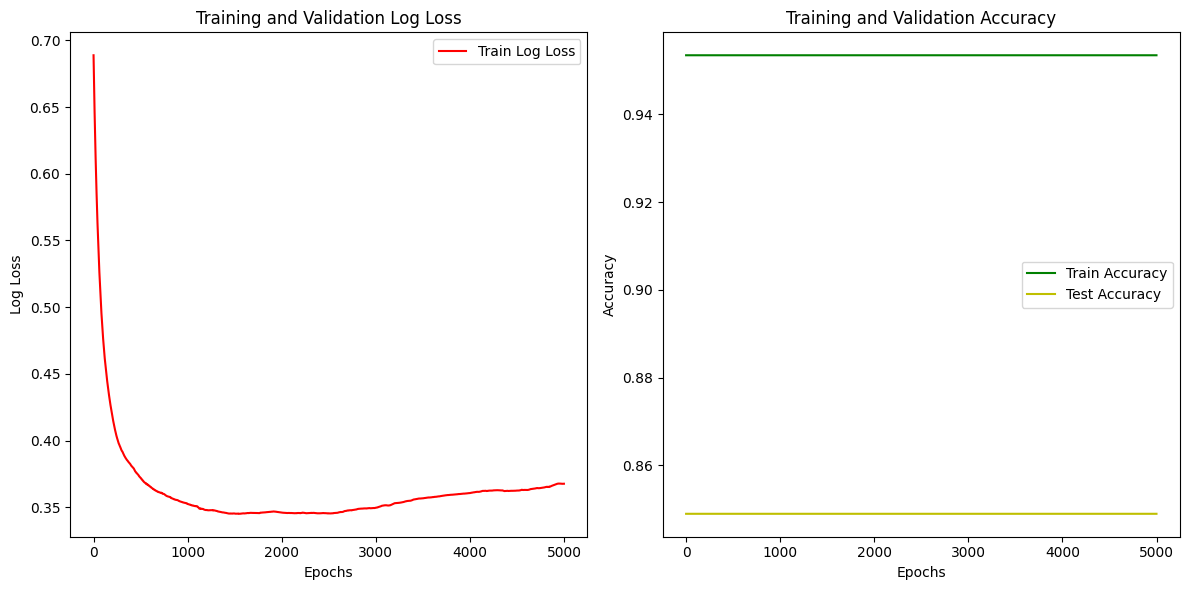

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# XGBoost 모델 초기화
model = XGBClassifier(
    n_estimators=5000,               # 트리 개수
    learning_rate=0.01,              # 학습률
    max_depth=5,                     # 최대 깊이
    reg_alpha=0.1,                   # L1 정규화
    reg_lambda=1,                     # L2 정규화
    objective='binary:logistic',     # 이진 분류
    eval_metric='logloss',           # 로지스틱 손실
    use_label_encoder=False           # 레이블 인코더 사용 안 함
)

# 모델 학습
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# 예측
y_pred = model.predict(X_test)

# 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print("정확도: ", accuracy)

# evals_result()로 손실 값 추출
results = model.evals_result()
print(results.keys())  # 확인용 출력

# epochs 수와 x_axis 생성
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss', color='r')

# validation_1 키 확인 후 추가
if 'validation_1' in results:
    plt.plot(x_axis, results['validation_1']['logloss'], label='Test Log Loss', color='b')
else:
    print("No validation loss for test set.")

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Validation Log Loss')

# 정확도 그래프
train_accuracy = [accuracy_score(y_train, model.predict(X_train))] * epochs
test_accuracy = [accuracy_score(y_test, model.predict(X_test))] * epochs

plt.subplot(1, 2, 2)
plt.plot(x_axis, train_accuracy, label='Train Accuracy', color='g')
plt.plot(x_axis, test_accuracy, label='Test Accuracy', color='y')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()
